# How to Train YOLOv8 Object Detection on a Custom Dataset

---

Original YOLOv8 repository [![Original YOLOv8 repository](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLOv8 sample implementation repository [![GitHub - YOLOv8 sample implementation repository](https://badges.aleen42.com/src/github.svg)](https://github.com/PhuTran1005/yolov8_sample_implementation)

---

Ultralytics YOLOv8 is a version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- Inference with Pre-trained COCO Model
- Training with Custom Dataset - Vehicles Dataset
- Validate Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Oct  6 16:36:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.40                 Driver Version: 536.40       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P0              25W /  85W |      0MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [32]:
import ultralytics
from ultralytics import YOLO

# Perform system checks
ultralytics.checks()

# Other imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import shutil
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
from shutil import copyfile
from pathlib import Path
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from PIL import Image, ImageDraw, ImageFont
from PIL import __version__ as pil_version

# Update the following imports to reflect the new package structure
from ultralytics.utils import LOGGER, TryExcept, plt_settings, threaded
from ultralytics.utils.plotting import *

from scipy.ndimage import gaussian_filter1d

%matplotlib inline


Ultralytics YOLOv8.2.101  Python-3.11.4 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete  (16 CPUs, 31.7 GB RAM, 321.1/453.2 GB disk)


In [2]:
import os
HOME = os.getcwd()
print(HOME)

D:\Global-Wheat-Detection\yolov8_sample_implementation\src


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **22.09.2024** with version **YOLOv8.2.98**.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.101  Python-3.11.4 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete  (16 CPUs, 31.7 GB RAM, 321.0/453.2 GB disk)


In [4]:
from ultralytics import YOLO

import os
from IPython.display import display, Image

## Training with Custom Dataset - Global Wheat Dataset

In [6]:
import os

# Get the current working directory
ROOT_DIR = "D:\Global-Wheat-Detection\yolov8_sample_implementation"
print(ROOT_DIR)

D:\Global-Wheat-Detection\yolov8_sample_implementation


In [10]:
# 3. Training
# Load a model
model_v8 = YOLO("yolov8n.pt")  # load pre trained model

# Use the model
results = model_v8.train(
                      data= "D:\Global-Wheat-Detection\yolov8_sample_implementation\dataset\dataset.yaml", # os.path.join(ROOT_DIR, "dataset/vehicles_dataset.yaml"),
                      epochs=10, # number of epoches
                      imgsz=640,  # training image size
                      batch=16, # batch size
                      device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
                    )

New https://pypi.org/project/ultralytics/8.3.5 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.101  Python-3.11.4 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:\Global-Wheat-Detection\yolov8_sample_implementation\dataset\dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cl

train: Scanning D:\Global-Wheat-Detection\yolov8_sample_impl

train: WARNING  D:\Global-Wheat-Detection\yolov8_sample_implementation\dataset\images\train\005b0d8bb.jpg: 20 duplicate labels removed
train: WARNING  D:\Global-Wheat-Detection\yolov8_sample_implementation\dataset\images\train\00ea5e5ee.jpg: 55 duplicate labels removed
train: WARNING  D:\Global-Wheat-Detection\yolov8_sample_implementation\dataset\images\train\010b216d4.jpg: 36 duplicate labels removed
train: WARNING  D:\Global-Wheat-Detection\yolov8_sample_implementation\dataset\images\train\01e2c61d9.jpg: 39 duplicate labels removed
train: WARNING  D:\Global-Wheat-Detection\yolov8_sample_implementation\dataset\images\train\01f37f1d3.jpg: 30 duplicate labels removed
train: WARNING  D:\Global-Wheat-Detection\yolov8_sample_implementation\dataset\images\train\029c79463.jpg: 48 duplicate labels removed
train: WARNING  D:\Global-Wheat-Detection\yolov8_sample_implementation\dataset\images\train\02b6f199c.jpg: 42 duplicate labels removed
train: WARNING  D:\Global-Wheat-Detection\yolov8_sample


val: Scanning D:\Global-Wheat-Detection\yolov8_sample_implem


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.29G      1.878      1.603       1.41     
                 Class     Images  Instances      Box(P     


                   all        675      30043      0.834      0.787      0.845      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.31G      1.696      1.004      1.277     
                 Class     Images  Instances      Box(P     

                   all        675      30043      0.855       0.81      0.876      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.78G      1.675     0.9394       1.27     
                 Class     Images  Instances      Box(P     

                   all        675      30043      0.877      0.816      0.888      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.88G      1.645     0.8988      1.254     
                 Class     Images  Instances      Box(P     


                   all        675      30043      0.881      0.828        0.9      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.13G      1.623     0.8744      1.243     
                 Class     Images  Instances      Box(P     


                   all        675      30043      0.873      0.831      0.899      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.66G      1.596     0.8306      1.229     
                 Class     Images  Instances      Box(P     


                   all        675      30043      0.882      0.842      0.909        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.19G       1.58     0.8124       1.22     
                 Class     Images  Instances      Box(P     

                   all        675      30043      0.881      0.847       0.91      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.43G      1.562     0.7884      1.216     
                 Class     Images  Instances      Box(P     

                   all        675      30043      0.896      0.853       0.92      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.24G      1.542     0.7703      1.202     
                 Class     Images  Instances      Box(P     

                   all        675      30043        0.9      0.866      0.925      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.03G      1.528     0.7534      1.193     
                 Class     Images  Instances      Box(P     

                   all        675      30043        0.9      0.864      0.927      0.531



10 epochs completed in 0.093 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 6.2MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics YOLOv8.2.101  Python-3.11.4 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P     


                   all        675      30043        0.9      0.864      0.927      0.531
               opacity        675      30043        0.9      0.864      0.927      0.531
Speed: 0.4ms preprocess, 1.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\train4


## Predict Custom Model

In [19]:
!dir

 D 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: F010-27C7

 D:\Global-Wheat-Detection\yolov8_sample_implementation\src 디렉터리

2024-10-06  오후 04:57    <DIR>          .
2024-10-06  오후 04:57    <DIR>          ..
2024-10-06  오후 04:26    <DIR>          .ipynb_checkpoints
2024-10-06  오후 04:36    <DIR>          runs
2024-10-06  오후 04:23               259 test.py
2024-10-06  오후 04:23               442 train.py
2024-10-06  오후 04:36         6,549,796 yolov8n.pt
2024-10-06  오후 04:57            73,220 YOLOv8_sample_implementation.ipynb
               4개 파일           6,623,717 바이트
               4개 디렉터리  141,926,113,280 바이트 남음


In [34]:
TEST_PATH = '../dataset/images/test'
MODEL_PATH = './runs/detect/train4/weights/best.pt'
model_v8 = YOLO(MODEL_PATH)
results = model_v8.predict(source=TEST_PATH, conf=0.5, iou=0.6, save_txt=True, save_conf=True);


image 1/10 D:\Global-Wheat-Detection\yolov8_sample_implementation\src\..\dataset\images\test\2fd875eaa.jpg: 640x640 24 opacitys, 37.3ms
image 2/10 D:\Global-Wheat-Detection\yolov8_sample_implementation\src\..\dataset\images\test\348a992bb.jpg: 640x640 33 opacitys, 38.4ms
image 3/10 D:\Global-Wheat-Detection\yolov8_sample_implementation\src\..\dataset\images\test\51b3e36ab.jpg: 640x640 23 opacitys, 34.9ms
image 4/10 D:\Global-Wheat-Detection\yolov8_sample_implementation\src\..\dataset\images\test\51f1be19e.jpg: 640x640 13 opacitys, 34.8ms
image 5/10 D:\Global-Wheat-Detection\yolov8_sample_implementation\src\..\dataset\images\test\53f253011.jpg: 640x640 27 opacitys, 34.9ms
image 6/10 D:\Global-Wheat-Detection\yolov8_sample_implementation\src\..\dataset\images\test\796707dd7.jpg: 640x640 13 opacitys, 33.9ms
image 7/10 D:\Global-Wheat-Detection\yolov8_sample_implementation\src\..\dataset\images\test\aac893a91.jpg: 640x640 19 opacitys, 33.9ms
image 8/10 D:\Global-Wheat-Detection\yolov8_sam

In [35]:
PRED_PATH = './runs/detect/predict/labels'

In [36]:
prediction_files = os.listdir(PRED_PATH)
print('Number of test images predicted as opaque: ', len(prediction_files))

Number of test images predicted as opaque:  10


In [37]:
import matplotlib.pyplot as plt

def display_preds_with_box(num):
    pred = []
    bbox = []
    image_id = []
    k = 1
    plt.figure(figsize=(30,30))
    for i in prediction_files[:num]:
        with open(f'{PRED_PATH}/{i}') as f:
            img = read_image(f'{TEST_PATH}/{i[:-4]}.jpg')
            bbox = []
            for j in f:
                pred = i[:-4] + " " + j[:-1]
                pred = pred.split(" ")
                pred.pop(0)
                pred.pop(0)
                pred.pop(-1)
                pred = [eval(i) for i in pred]
                pred = [i*1024 for i in pred]
                [x, y, w, h] = pred
                [xmin, ymin, xmax, ymax] = [x-w/2, y-h/2, x+w/2, y+h/2]
                pred = [xmin, ymin, xmax, ymax]
                bbox.append(pred)
            bbox = torch.tensor(bbox, dtype=torch.int)
            img = draw_bounding_boxes(img, bbox, width=10,colors=(255,0,0))
            img = torchvision.transforms.ToPILImage()(img)
            plt.subplot(num//3+num%3,3,k)
            k+=1
            plt.imshow(img)
            plt.axis('off')

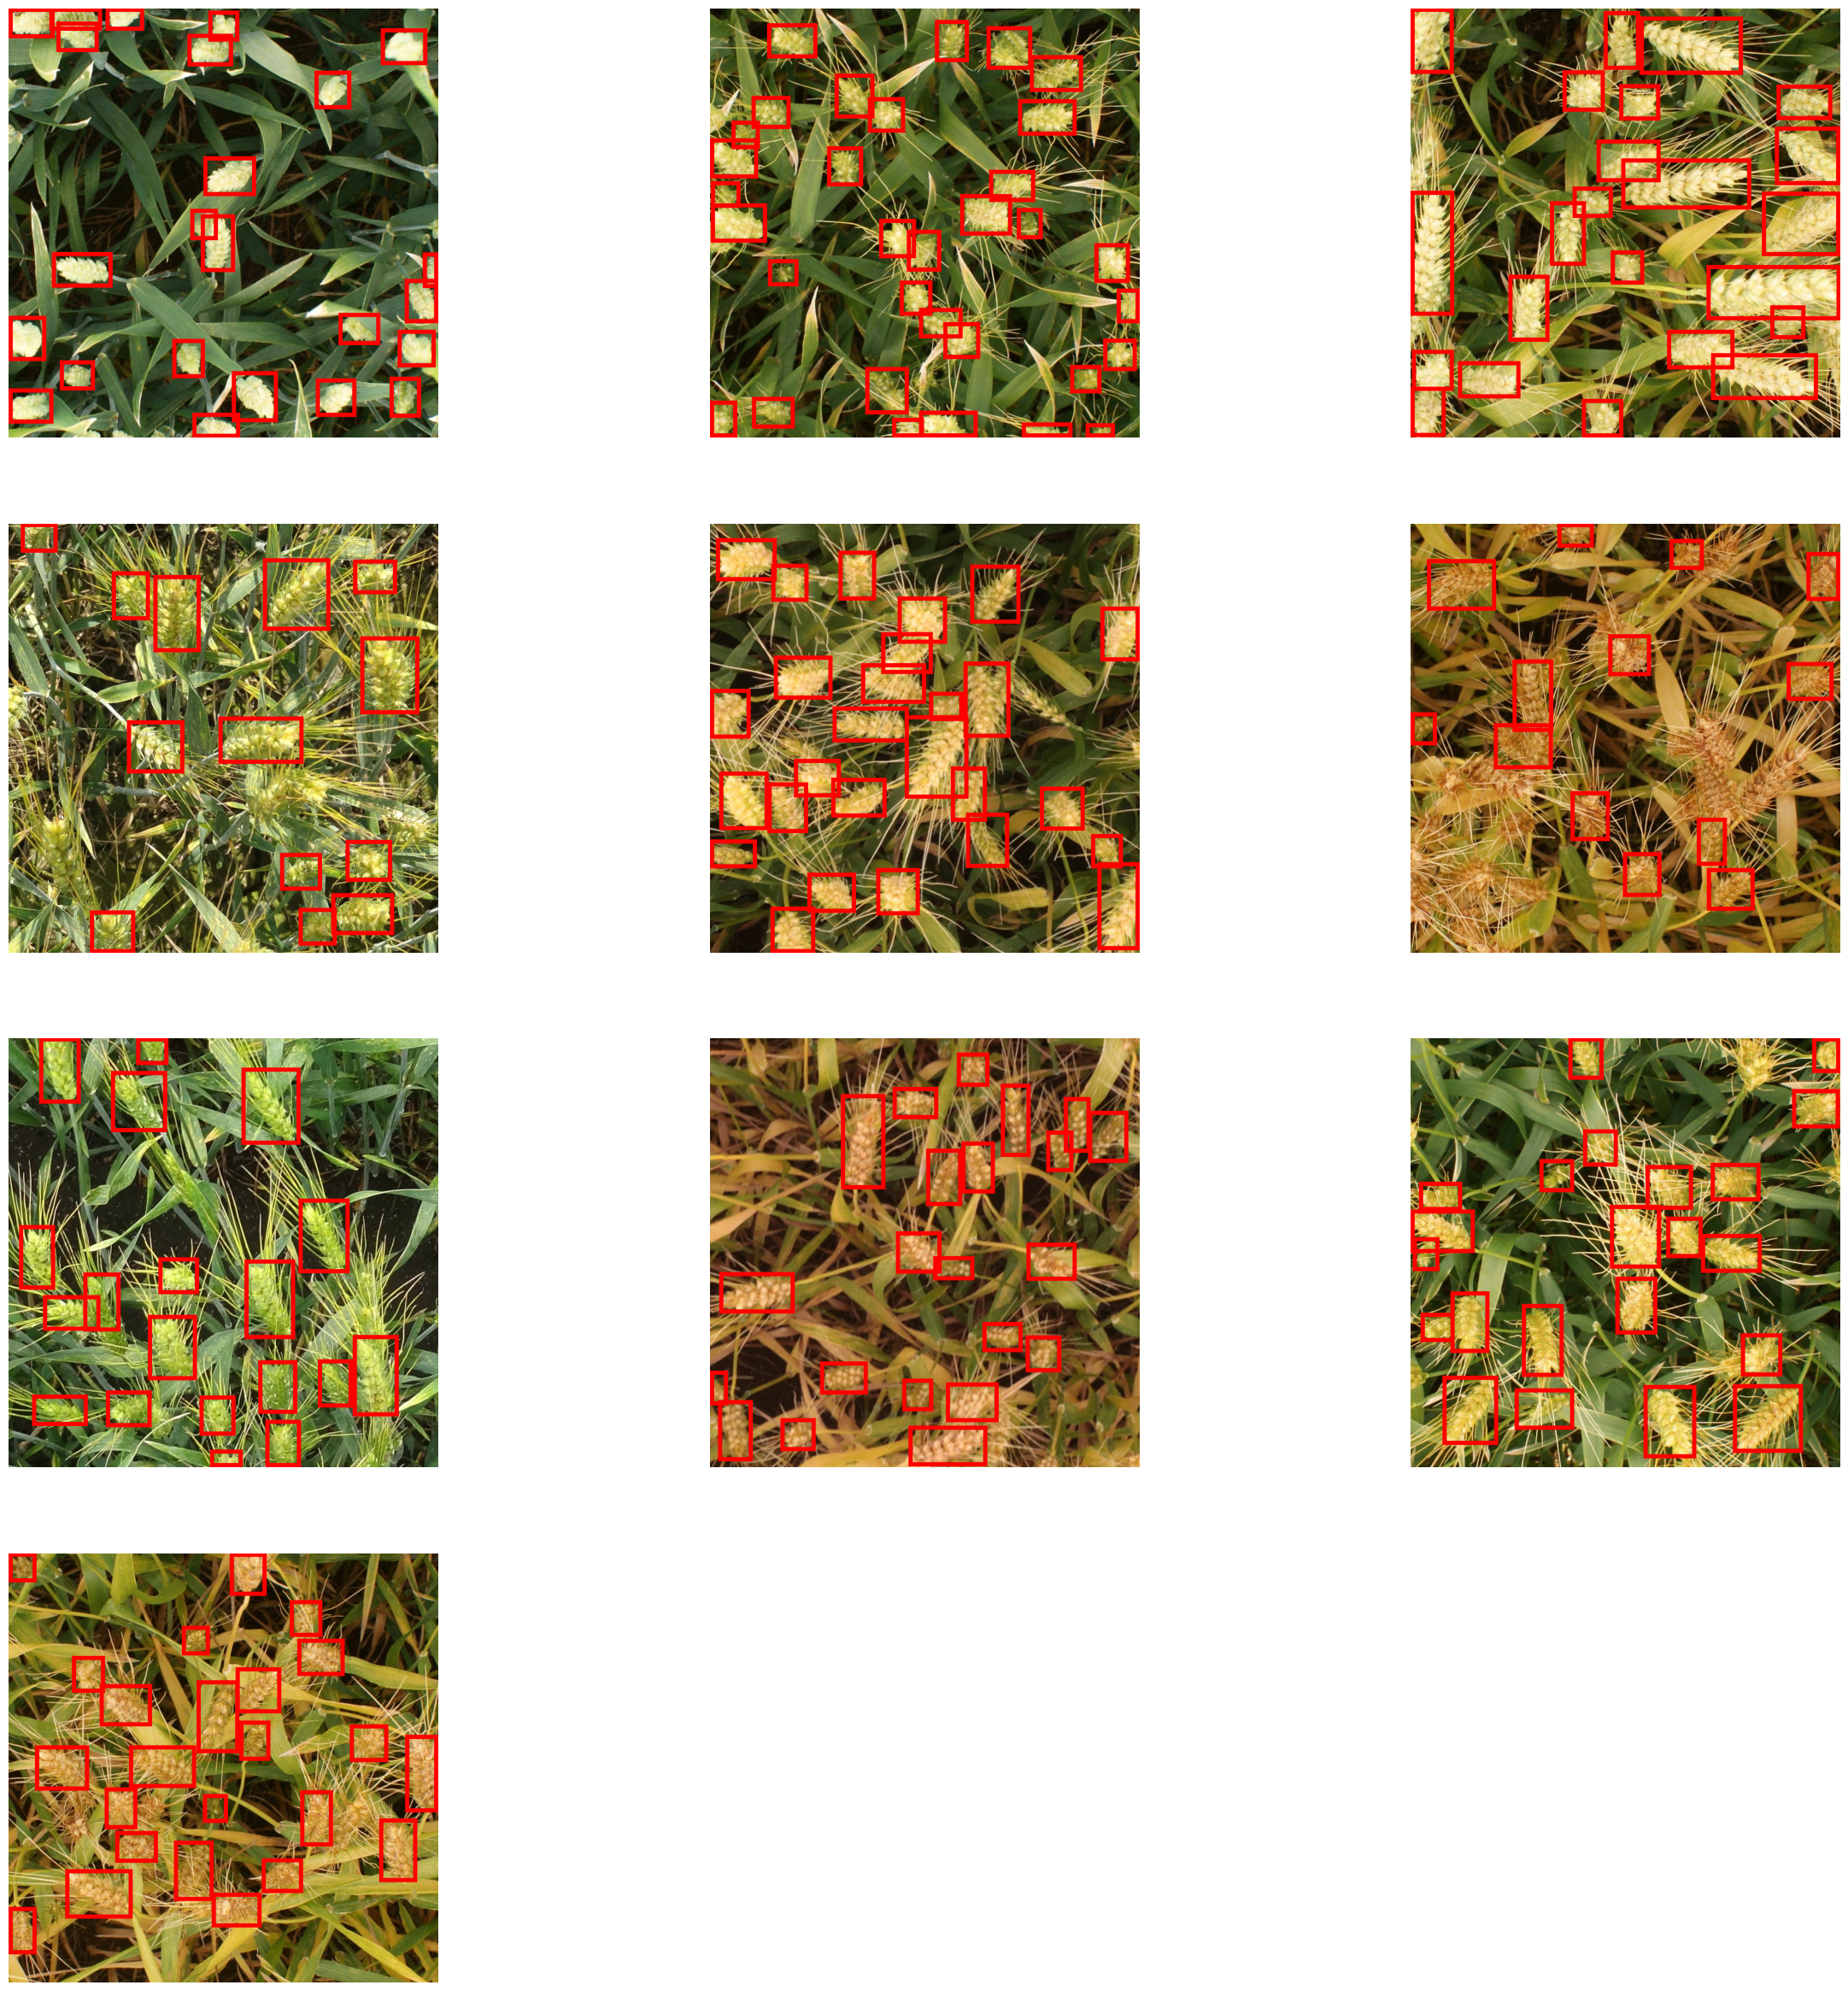

In [38]:
display_preds_with_box(10)